Adriana Dropulic
Biophysics Problem Set #4 

Problem 53

In [ ]:
#!python
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import math as math 
from scipy.optimize import curve_fit
file = open("/Users/adrianadropulic/Desktop/omega.txt","r")
angular_velocities = file.read()
angular_velocities = list(angular_velocities.split("\n"))
ang_vel = []
for item in angular_velocities:
    ang_vel.append(float(item))
print(ang_vel[0:10])

Samples are taken at 60 times per second. What is the distribution of times spend during each segement of positive or negative (clockwise or counterclockwise) velocity? So 60 samples = 1 sec

Ok, so have to see how many times you get a negative number in a row and then how many times you get a positive before it switches. 

x = np.linspace(0,len(ang_vel)-1, len(ang_vel))
plt.scatter(x[1:50],ang_vel[1:50],marker='.')

In [2]:
def waiting_time_distribution(ang_vel_arr,xidx,yidx,histcolor,linecolor):
    print(len(ang_vel_arr))
    isPositive = 0;
    time_spent_negative = []
    time_spent_positive = []
    global entry_i;
    entry_i = 0;
    while (entry_i < len(ang_vel_arr)):
        #print(entry_i)
        #print(isPositive)
        if entry_i > len(ang_vel_arr): break;
        #if entry_i > 0: entry_i = entry_i_new
        #print("entry_i in outer for loop " + str(entry_i))
        if ang_vel_arr[entry_i] < 0 : isPositive = False;
        elif ang_vel_arr[entry_i] > 0 :isPositive = True;
        #print(isPositive)
        if isPositive == False: 
            neg_vel = 1;
            #find next positive entry 
            for entry_j in range(entry_i+1, len(ang_vel_arr)+1):
                if entry_j == len(ang_vel_arr): 
                    entry_i = len(ang_vel_arr)
                    #print("entry_i at length " + str(entry_i))
                    break
                if ang_vel_arr[entry_j] < 0: neg_vel = neg_vel + 1;
                elif ang_vel_arr[entry_j] > 0: 
                    #print("neg_vel " + str(neg_vel))
                    time_spent_negative.append(neg_vel/60) #time in seconds
                    entry_i = entry_j
                    #print("entry_i after isPositive == False " + str(entry_i))
                    break  
        elif isPositive == True: 
            pos_vel = 1;
            #find next positive entry 
            for entry_j in range(entry_i+1, len(ang_vel_arr)+1):
                if entry_j == len(ang_vel_arr): 
                    entry_i = len(ang_vel_arr)
                    #print("entry_i at length " + str(entry_i))
                    break 
                if ang_vel_arr[entry_j] > 0: pos_vel = pos_vel + 1;
                elif ang_vel_arr[entry_j] < 0: 
                    #print("pos_vel " + str(pos_vel))
                    time_spent_positive.append(pos_vel/60) #time in seconds
                    entry_i = entry_j
                    #print("entry_i after isPositive == True " + str(entry_i))
                    break
 
    time_spent = time_spent_negative + time_spent_positive;
    hist, bin_edges = np.histogram(time_spent, bins = np.linspace(0,np.max(time_spent),35));
    plt.hist(bin_edges[:-1], bin_edges, weights=hist,histtype='step',color = histcolor,fill = True,alpha=0.5,label= 'All waiting times');
    plt.xlabel('Time spent rotating (sec)')
    plt.ylabel('Number of segments')
    plt.title('Waiting time distribution for ' + str(np.floor(xidx/60)) + ' to ' + str(np.ceil(yidx/60)) + ' seconds')

    popt_exp, pcov_exp = curve_fit(exponential, bin_edges[:-1], hist)
    print(popt_exp)
    plt.plot(bin_edges[:-1], exponential(bin_edges[:-1], popt_exp[0], popt_exp[1], popt_exp[2]),label = 'exp fit',color = linecolor);

    plt.legend(loc="upper right")
    plt.show()
                    
    return time_spent,time_spent_negative,time_spent_positive

In [3]:
def exponential(x, a, b, c):
    return (a * np.exp(-b * np.array(x)) + c)

359002
[8.72740850e+02 5.01754143e-01 1.03129019e+00]


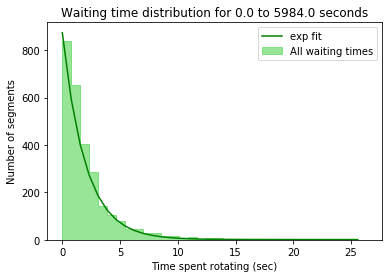

In [4]:
ts, tsn, tsp = waiting_time_distribution(ang_vel,0,len(ang_vel),'limegreen','green');

The exponential fit of waiting times is conistent with a Poisson process. 

[ 3.55301642e+02  3.86567863e-01 -1.23315191e-02]
[501.74868912   0.59244158  -0.93293539]


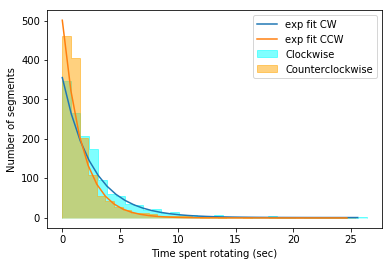

In [5]:
hist_neg, bin_edges_neg = np.histogram(tsn, bins = np.linspace(0,np.max(tsn),35));
plt.hist(bin_edges_neg[:-1], bin_edges_neg, weights=hist_neg,histtype='step',color = 'aqua',fill = True,alpha=0.5,label= 'Clockwise');

hist_pos, bin_edges_pos = np.histogram(tsp, bins = np.linspace(0,np.max(tsp),35));
plt.hist(bin_edges_pos[:-1], bin_edges_pos, weights=hist_pos,histtype='step',color = 'orange',fill = True,alpha=0.5,label='Counterclockwise');
plt.xlabel('Time spent rotating (sec)')
plt.ylabel('Number of segments')


popt_exp_neg, pcov_exp_neg = curve_fit(exponential, bin_edges_neg[:-1], hist_neg)
print(popt_exp_neg)
plt.plot(bin_edges_neg[:-1], exponential(bin_edges_neg[:-1], popt_exp_neg[0], popt_exp_neg[1], popt_exp_neg[2]),label = 'exp fit CW')

popt_exp_pos, pcov_exp_pos = curve_fit(exponential, bin_edges_pos[:-1], hist_pos)
print(popt_exp_pos)
plt.plot(bin_edges_pos[:-1], exponential(bin_edges_pos[:-1], popt_exp_pos[0], popt_exp_pos[1], popt_exp_pos[2]),label = 'exp fit CCW')

plt.legend(loc="upper right")
plt.show()

Including exponential distributions for negative and positive waiting times separately.

c) Look at velocity vs time in the data set. Are the data stationary (time-translation invariant)? If you focus on segments of the data that are clearly stationary, does it change your conclusions in part b?

Text(0,0.5,'Angular Velocity')

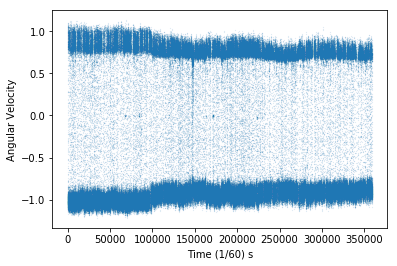

In [19]:
plt.plot(ang_vel,marker='.',linestyle='',ms=.1)
plt.xlabel('Time (1/60) s')
plt.ylabel('Angular Velocity')

In this plot, it looks like the magnitude of the velocity decreases slowly over time. But, there are segments of data that the maximum values of velocity appear stationary (from 0-100000, from 100000-160000, from 160000-250000, from 250000-359002). I suppose that the question wants us to find the waiting time distributions within some of these segments. In part a it says, "the velocity switches between positive and negative values, but these values are fairly constant," which makes me think that part c is referring to this interpretation of "statistically stationary data." 

100000
[2.16833828e+02 5.25378165e-01 1.61493933e-01]


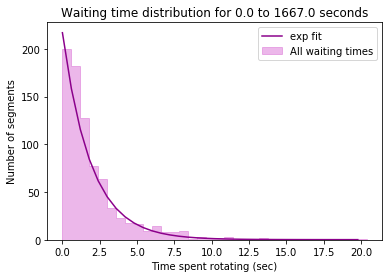

In [23]:
waiting_time_distribution(ang_vel[0:100000],0,100000,'orchid','darkmagenta');

60000
[ 9.34164470e+01  5.35917706e-01 -2.12884853e-02]


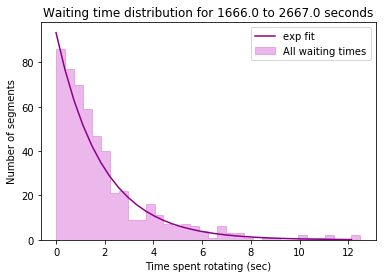

In [24]:
waiting_time_distribution(ang_vel[100000:160000],100000,160000,'orchid','darkmagenta');

90000
[193.71219434   0.48636009  -0.57106714]


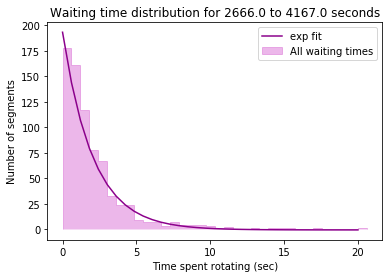

In [25]:
waiting_time_distribution(ang_vel[160000:250000],160000,250000,'orchid','darkmagenta');

109002
[184.32249651   0.42647343   0.62059721]


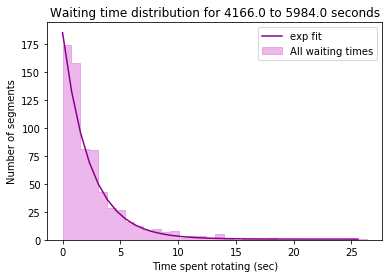

In [26]:
waiting_time_distribution(ang_vel[250000:359002],250000,359002,'orchid','darkmagenta');

When focusing on the times that appear stationary, the distributions still appear exponential. 

d) Sometimes angular velocity makes a partial switch but not a full switch to opposite direction of rotation. Qualitatively, what is happening in these cases?

Text(0,0.5,'Angular Velocity')

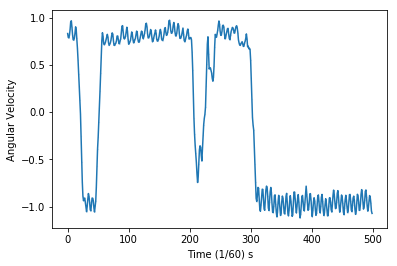

In [27]:
plt.plot(ang_vel[102500:103000],marker='.',linestyle='-',ms=.1)
plt.xlabel('Time (1/60) s')
plt.ylabel('Angular Velocity')

An example of one of the partial switches is shown at t = 200. The organism's angular velocity almost completely switches direction, but returns to the prior value. What is probably happening is that the bacteria recieved new information (i.e. detected a particle or not) which directed it to return to its previous state before completing the switch. A simple way  to analyze the velocity versus time of such an event could be to fit a gaussian and analyzing the full width half max, to see how long it takes for the orangism to make a partial switch. Another quantitative technique could involve applying some cut on the acceleration of the organism to describe the "peak" itself around t = 200. A model could be some action that briefly changes the state of a particle, but it returns to its original state. Perhaps this could be modeled by something running into the organism (so, instead of a chemical signal, it would be a physical one). 